In [511]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(9)))

def y_gen(x):
    h_11 = math.tanh(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_21 = 1/(1 + np.exp(-(paras[6] * h_11 + paras[7] * h_12 + paras[8])))
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

In [512]:
# Spliting dataset into training, validation, and test.
# DO NOT MODIFY THIS PART

from sklearn.model_selection import train_test_split

r = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r)

x_val = x_train[:int(n*r)]
partial_x_train = x_train[int(n*r):]
y_val = y_train[:int(n*r)]
partial_y_train = y_train[int(n*r):]

*** Write down your answer here ***

Formula of bias for layer 2

$$\frac{\partial L}{\partial b^2} = \hat{y}_1(1-\hat{y}_1)(\hat{y}_1-y_1)$$

Formula of weights of layer 2
$$\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}}
\end{bmatrix} = \begin{bmatrix}
\hat{y}_1(1-\hat{y}_1)(\hat{y}_1-y_1)h^1_1\\
\hat{y}_1(1-\hat{y}_1)(\hat{y}_1-y_1)h^1_2
\end{bmatrix}
$$

Formula of biases of layer 1
$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}
\end{bmatrix} = \begin{bmatrix}
\hat{y}1(1-\hat{y}_1)(\hat{y}_1-y_1)w^2{11}(1-(h^1_1)^2)\\
\hat{y}1(1-\hat{y}_1)(\hat{y}_1-y_1)w^2{21}(1-(h^1_2)^2)
\end{bmatrix}
$$

Formula of weights of layer 1
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}}\\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}
\end{bmatrix} = \begin{bmatrix}
\hat{y}1(1-\hat{y}_1)(\hat{y}_1-y_1)w^2{11}(1-(h^1_1)^2)x_1 & \hat{y}1(1-\hat{y}_1)(\hat{y}_1-y_1)w^2{21}(1-(h^1_2)^2)x_1\\
\hat{y}1(1-\hat{y}_1)(\hat{y}_1-y_1)w^2{11}(1-(h^1_1)^2)x_2 & \hat{y}1(1-\hat{y}_1)(\hat{y}_1-y_1)w^2{21}(1-(h^1_2)^2)x_2
\end{bmatrix}
$$

In [513]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [514]:
def tanh(z):
    return np.tanh(z)

In [515]:

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [516]:
def tanh_derivative(x):
    return 1 - np.square(x)

In [517]:
def meansqure_error(y_pred,y):
    return np.mean((y_pred - y)**2)

In [522]:
import numpy as np

input_layer_size=2
output_layer_size=1
hidden_layer_size=2
epochs=100
learning_rate=0.0002

scale1 = np.sqrt(2 / (input_layer_size + hidden_layer_size))
scale2 = np.sqrt(2 / (hidden_layer_size+ output_layer_size))
input_weights = np.random.randn(input_layer_size, hidden_layer_size) * scale1
output_weights = np.random.randn(hidden_layer_size, output_layer_size) * scale2

# Initialize biases
hidden_bias = np.zeros((1, hidden_layer_size))
output_bias = np.zeros((1, output_layer_size))

def forward(x):
    z1=np.dot(x,input_weights)+hidden_bias
    a1=np.tanh(z1)
    z2=np.dot(a1,output_weights)+output_bias
    a2=sigmoid(z2)
    return a1,a2

def backward(x, y, a1, a2, output_weights, learning_rate):
    y = np.asarray(y)
    y = y.reshape(y.shape[0],1)
    d_z2 = (a2 - y) * sigmoid_derivative(a2)
    d_output_weights = np.dot(a1.T, d_z2)
    d_output_bias = np.sum(d_z2, axis=0, keepdims=True)
    d_z1 = np.dot(d_z2, output_weights.T) * tanh_derivative(a1)
    d_input_weights = np.dot(np.asarray(x).T, d_z1)
    d_input_bias = np.sum(d_z1, axis=0, keepdims=True)
    return d_output_weights,d_output_bias,d_input_weights,d_input_bias

    
def train(x,y,x_val,y_val,learning_rate):
    training_loss=[]
    validation_loss= []
    for i in range(0,100):
        a1,y_pred= forward(x)
        result_train = meansqure_error(y,y_pred)
        training_loss.append(result_train)
        d_output_weights,d_output_bias,d_input_weights,d_input_bias= backward(x,y,a1,y_pred,output_weights,learning_rate)
        # Update weights and biases
        d_output_weights -= learning_rate*d_output_weights
        d_output_bias    -= learning_rate*d_output_bias
        d_input_weights  -= learning_rate*d_input_weights
        d_input_bias     -= learning_rate*d_input_bias
        aa,y_pred_val =forward(x_val)
        
        # Calculate the validation loss
        val_loss = meansqure_error(y_val, y_pred_val)
        validation_loss.append(val_loss)
            
        print(f"Epoch {i+1}: training loss = {result_train:.4f}, validation loss = {val_loss:.4f}")
        
    return training_loss, validation_loss

train_losses, val_losses = train(partial_x_train, partial_y_train, x_val, y_val, learning_rate)

Epoch 1/100
150/150 [==============================] - 2s 5ms/step - loss: 0.0299 - val_loss: 0.0334
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.0332
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.0328
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.0326
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.0324
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0275 - val_loss: 0.0322
Epoch 8/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0272 - val_loss: 0.0319
Epoch 9/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0316
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0265 - val_lo

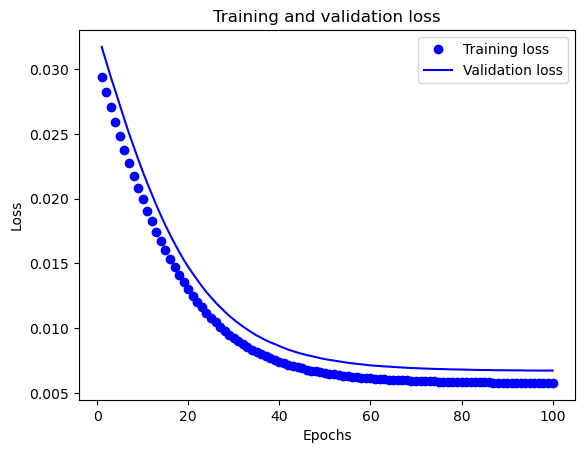

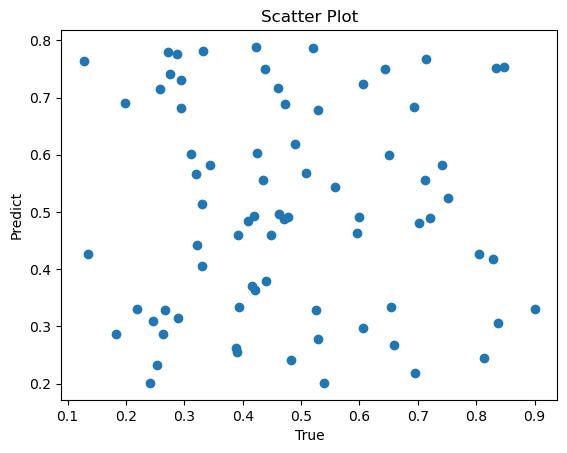

In [519]:
# Visualizing losses and prediction
# DO NOT MODIFY THIS PART

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Scatter Plot')
plt.xlabel('True')
plt.ylabel('Predict')
plt.scatter(y_test, y_pred)